In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates=['Date'], index_col='Date')

In [7]:
X=df.values
print('Shape of data /t',df.shape)
print('Original Dataset:\n',df.head())
print('After Extracting only temperatures:\n',X)

Shape of data /t (3650, 1)
Original Dataset:
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After Extracting only temperatures:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

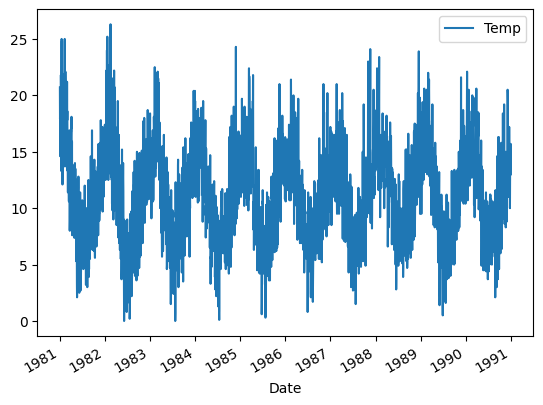

In [8]:
df.plot()

<Axes: xlabel='Date'>

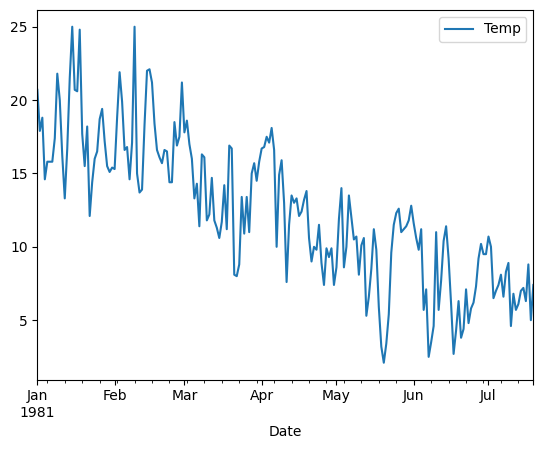

In [9]:
df[:200].plot()

In [10]:
# No evident 

# ADF Test

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value :", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Usd for ADF Regression andd critical values Calculation : ", dftest[3])
print("5. Critical Values : ",)
for key, val in dftest[4].items():
    print("\t",key, ": ",val)

1. ADF :  -4.444804924611693
2. P-Value : 0.000247082630036105
3. Num Of Lags :  20
4. Num Of Observations Usd for ADF Regression andd critical values Calculation :  3629
5. Critical Values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


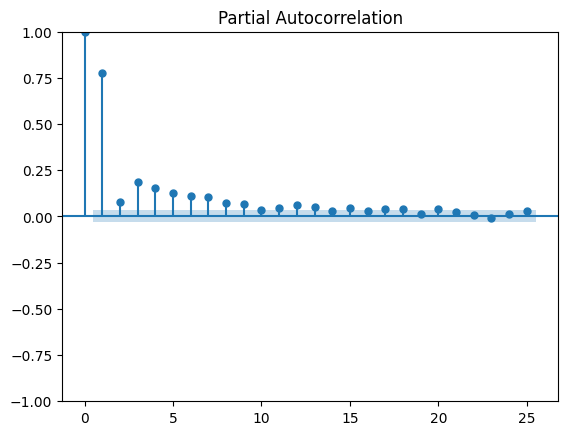

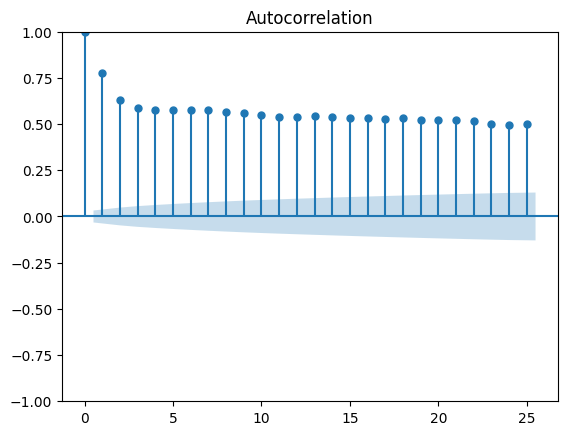

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf=plot_pacf(df['Temp'],lags=25)
acf=plot_acf(df['Temp'],lags=25)

In [22]:
# Partial correlation measures the direct relationship between two variables while controlling 
# for the effect of other variables, whereas autocorrelation measures 
# the correlation of a variable with its past values over time.

In [23]:
# fpacf p
# acf = q

In [24]:
# pacf => ma
# acf => ar

## Split Dataset into Train and Test Testing: Last 7 days

In [25]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [26]:
model=AutoReg(train,lags=10)

In [27]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 19 Mar 2025   AIC                          16775.028
Time:                        15:29:04   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [28]:
# 0.05 < lag value 
# then significant

In [29]:
print(len(train))

3643


In [30]:
print(len(test))

7


## Make Predictioned on Test Set and Compare

In [31]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

In [32]:
print(len(pred))

7


In [33]:
print(len(test))

7


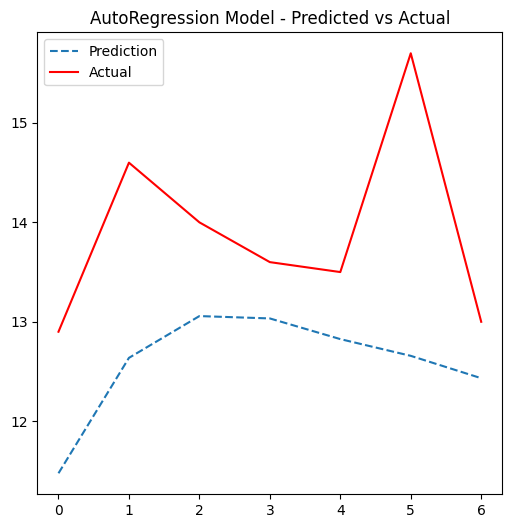

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


In [34]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(6,6))
plt.plot(pred, label='Prediction', linestyle='dashed')
plt.plot(test, label='Actual', linestyle='solid', color='red')
plt.legend()
plt.title('AutoRegression Model - Predicted vs Actual')
plt.show() 

# Print predicted values
print(pred)

In [35]:
# //
print(pred)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


In [36]:
# //
print(test)

[[12.9]
 [14.6]
 [14. ]
 [13.6]
 [13.5]
 [15.7]
 [13. ]]


### Calcualte Error

In [37]:
# // mycode
 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

# Print error values
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 1.3111923340212548
MSE: 2.4455318104214663
RMSE: 1.5638196220860852


In [38]:
test.shape

(7, 1)

In [39]:
pred.shape

(7,)

In [40]:
from sklearn.metrics import mean_squared_error

In [42]:
rmse = np.sqrt(mean_squared_error(test, pred))

## Making Future Predictions

In [53]:
pred_future=model_fit.predict(start=len(X),end=len(X)+6,dynamic=False)

print("The Future prediction for the next week")
print(pred_future)
print("Number of Prediction Made:",len(pred_future))

The Future prediction for the next week
[12.36671014 12.28608804 12.20309536 12.24915916 12.30618875 12.31199689
 12.27225975]
Number of Prediction Made: 7


In [49]:
print('Number of Predictions Made:', len(pred_future))

Number of Predictions Made: 7
